In [1]:
!pip install tweepy

In [2]:
import requests
import os
import pandas as pd
import numpy as np
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# 1) Gathering Data

#### Open the twitter archive enhanced csv file

In [3]:
df_twit_arch = pd.read_csv('twitter-archive-enhanced.csv')
df_twit_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Download the image prediction data and show it

In [4]:
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [5]:
with open('image-predictions.tsv', mode='wb') as outfile:
    outfile.write(response.content)

In [6]:
images = pd.read_csv('image-predictions.tsv', sep='\t', encoding='utf-8')

In [7]:
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Gather Twitter API Data

- The following section is commented because I don't have access to the Twitter archive.

In [8]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

In [9]:
# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

In [10]:
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df_twit_arch.tweet_id.values
# len(tweet_ids)

In [11]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [12]:
df_list = []
with open('tweet-json.txt') as file:
    for line in file:
        data = json.loads(line)
        keys = data.keys()
        user = data.get('user')
        id_str = data.get('id_str')
        retweet_count = data.get('retweet_count')
        favorite_count = data.get('favorite_count')
        df_list.append({'id_str': id_str,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})

In [13]:
tweet_count = pd.DataFrame(df_list, columns = ['id_str', 'retweet_count', 'favorite_count'])

Now that all three tables have been created, we'll procede with the assessment.

# 2) Assessing Data

#### First I'll look at the three tables and see if just by seeing them I can see some clear problems.

In [14]:
df_twit_arch

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [15]:
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [16]:
tweet_count

,id_str,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


#### I found the following problems:

### **Quality**

- `df_twit_arch`

  - Following columns have NaN values: 
    - `in_reply_to_status_id`
    - `in_reply_to_user_id`
    - `retweeted_status_id`
    - `retweeted_status_user_id`
    - `retweeted_status_timestamp`
  
  - Column *floofer* should be *floof*
  
  - Dog stage *floofer* should be *floof*
  
- `images`

  - Following columns have uppercase and lowercase values (inconsistently)
    - `p1`
    - `p2`
    - `p3`

### **Tidiness**

- `tweet_count` should merge with `df_twit_arch`. The data in those tables is related.

- `df_twit_arch`

  - Dog stages (`doggo`, `floofer`, `pupper`, `puppo`) should be in one column (such as one named `stages`)

#### Now I'll make a programmatic assessment of the tables.

In [17]:
df_twit_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [18]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
tweet_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_str          2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [20]:
df_twit_arch.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
          ... 
Banjo        1
Arlo         1
Ambrose      1
Devón        1
Spark        1
Name: name, Length: 957, dtype: int64

In [21]:
df_twit_arch.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [22]:
df_twit_arch.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [23]:
df_twit_arch.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [24]:
df_twit_arch.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [25]:
df_twit_arch.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [26]:
df_twit_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [27]:
images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [28]:
tweet_count.describe()

,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


In [29]:
df_twit_arch.duplicated().any()

False

In [30]:
images.duplicated().any()

False

In [31]:
tweet_count.duplicated().any()

False

#### In the programatic assessment I found the following problems:

### **Quality**

- `df_twit_arch`

  - `timestamp` should be *datetime64* dtype.
  
  - In the `name` column there are a lot of missing values (*None*) and some values that don't make sense (like *a*).
  
  - The following columns have missing values (less than 2354 values):
    - `doggo` (2259)
    - `floofer` (2346)
    - `pupper` (2099)
    - `puppo` (2326)
    - `tweet_id` should be *object* dtype.
  
- `tweet_count`

  - `id_str` is not a clear name, and it's different from the one in the other table.
  

  

### **Tidiness**

- `df_twit_arch`

  - `source` has too much information in it, and it's too cluttered. 

## The overall quality and tidiness assessment is as follows:

### All assessment

### **Quality**

- `df_twit_arch`

  - Following columns have NaN values: 
    - `in_reply_to_status_id`
    - `in_reply_to_user_id`
    - `retweeted_status_id`
    - `retweeted_status_user_id`
    - `retweeted_status_timestamp`
  
  - *floofer* should be *floof*
  
  - Dog stage *floofer* should be *floof*
  
  - `timestamp` should be *datetime64* dtype.
  
  - In the `name` column there are a lot of missing values (*None*) and some values that don't make sense (like *a*).
  
  - The following columns have missing values (less than 2354 values):
    - `doggo` (2259)
    - `floofer` (2346)
    - `pupper` (2099)
    - `puppo` (2326)

  - `tweet_id` should be *object* dtype.
  
- `images`

  - Following columns have uppercase and lowercase values (inconsistently)
    - `p1`
    - `p2`
    - `p3`
    
- `tweet_count`

  - `id_str` is not a clear name, and it's different from the one in the other table.

### **Tidiness**

- `tweet_count` should merge with `df_twit_arch`. The data in those tables is related.

- `df_twit_arch`

  - `source` has too much information in it, and it's too cluttered. 
  - Dog stages (`doggo`, `floofer`, `pupper`, `puppo`) should be in one column (such as one named `stages`)

# 3) Cleaning Data

*Define*

First I will create duplicates of the tables and I will work with them exclusively.

*Code*

In [32]:
arch_clean = df_twit_arch.copy()
images_clean = images.copy()
tweet_clean = tweet_count.copy()

*Test*

In [33]:
arch_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [34]:
images_clean.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [35]:
tweet_clean.head(2)

,id_str,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819


## Quality issues

### `arch_clean` / `df_twit_arch`

*Define*

Now I will remove the retweets, replies to original tweet and replies to replies (since they won't be necessary for the analysis) by removing the rows with duplicated text and then entirely removing the following columns:

- `in_reply_to_status_id`
- `in_reply_to_user_id`
- `retweeted_status_user_id`
- `retweeted_status_timestamp`

*Code*

In [36]:
arch_clean[(pd.isnull(arch_clean.in_reply_to_status_id))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [37]:
arch_clean = arch_clean[(pd.isnull(arch_clean.in_reply_to_status_id))]
arch_clean = arch_clean[(pd.isnull(arch_clean.in_reply_to_user_id))]
arch_clean = arch_clean[(pd.isnull(arch_clean.retweeted_status_user_id))]
arch_clean = arch_clean[(pd.isnull(arch_clean.retweeted_status_timestamp))]

In [38]:
arch_clean = arch_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1)

*Test*

In [39]:
arch_clean

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


The first quality issue is now solved (columns with NaN values).

*Define*

Now I will change the column name `floofer` to `floof`.

*Code*

In [40]:
arch_clean = arch_clean.rename(columns={'floofer':'floof'})

*Test*

In [41]:
arch_clean.head(1)

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floof,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


The second quality issue is now solved (*floofer* should be *floof*).

*Define*

Now I will replace all instances of *floofer* to *floof*.

*Code*

In [42]:
arch_clean = arch_clean.replace({'floof': {'floofer': 'floof'}})

*Test*

In [43]:
arch_clean.floof.value_counts()

None     2087
floof      10
Name: floof, dtype: int64

*Define*

Different dog stages columns have *None* values (*doggo*, *floof*, *pupper*, *puppo*). I'll replace them with empty strings.

*Code*

In [44]:
arch_clean.doggo.replace('None', '', inplace=True)
arch_clean.floof.replace('None', '', inplace=True)
arch_clean.pupper.replace('None', '', inplace=True)
arch_clean.puppo.replace('None', '', inplace=True)

*Test*

In [45]:
arch_clean.doggo.str.count('').sum()

2512

In [46]:
arch_clean.floof.str.count('').sum()

2147

In [47]:
arch_clean.pupper.str.count('').sum()

3477

In [48]:
arch_clean.puppo.str.count('').sum()

2217

*Define*

Now I will put all dog stages into one column (that is, `doggo`, `floof`, `pupper`, `puppo` inside a new `stages` column).

*Code*

In [49]:
arch_clean['stage'] = arch_clean.doggo + arch_clean.floof + arch_clean.pupper + arch_clean.puppo

In [50]:
arch_clean.stage.value_counts()

               1761
pupper          221
doggo            72
puppo            23
floof             9
doggopupper       9
doggopuppo        1
doggofloof        1
Name: stage, dtype: int64

In [51]:
arch_clean.loc[arch_clean.stage == 'doggopupper', 'stage'] = 'doggo,pupper'
arch_clean.loc[arch_clean.stage == 'doggofloof', 'stage'] = 'doggo,floof'
arch_clean.loc[arch_clean.stage == 'doggopuppo', 'stage'] = 'doggo,puppo'

In [52]:
arch_clean.loc[arch_clean.stage == '', 'stage'] = np.nan

In [53]:
arch_clean.drop(['doggo', 'floof', 'pupper', 'puppo'], axis=1, inplace=True)

*Test*

In [54]:
arch_clean.stage.value_counts()

pupper          221
doggo            72
puppo            23
floof             9
doggo,pupper      9
doggo,floof       1
doggo,puppo       1
Name: stage, dtype: int64

*Define*

Now I will change `timestamp` dtype to datetime64.

*Code*

In [55]:
arch_clean.timestamp = pd.to_datetime(arch_clean.timestamp)

*Test*

In [56]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   tweet_id             2097 non-null   int64              
 1   timestamp            2097 non-null   datetime64[ns, UTC]
 2   source               2097 non-null   object             
 3   text                 2097 non-null   object             
 4   retweeted_status_id  0 non-null      float64            
 5   expanded_urls        2094 non-null   object             
 6   rating_numerator     2097 non-null   int64              
 7   rating_denominator   2097 non-null   int64              
 8   name                 2097 non-null   object             
 9   stage                336 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(5)
memory usage: 180.2+ KB


*Define*

In the `name` column there are a lot of missing values (*None*) and some values that don't make sense (like *a*). To fix it I'll convert all dog names that start with lowercase to NaN.

*Code*

In [57]:
mask = arch_clean.name.str.islower()
column_name = 'name'
arch_clean.loc[mask, column_name] = np.nan

*Test*

In [58]:
arch_clean.name.value_counts()

None       603
Lucy        11
Charlie     11
Oliver      10
Cooper      10
          ... 
Burt         1
Jarod        1
Vince        1
Marty        1
Spark        1
Name: name, Length: 930, dtype: int64

*Define*

`tweet_id` should be *object* dtype.

*Code*

In [59]:
arch_clean.tweet_id = arch_clean.tweet_id.astype('object')

*Test*

In [60]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   tweet_id             2097 non-null   object             
 1   timestamp            2097 non-null   datetime64[ns, UTC]
 2   source               2097 non-null   object             
 3   text                 2097 non-null   object             
 4   retweeted_status_id  0 non-null      float64            
 5   expanded_urls        2094 non-null   object             
 6   rating_numerator     2097 non-null   int64              
 7   rating_denominator   2097 non-null   int64              
 8   name                 1993 non-null   object             
 9   stage                336 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(6)
memory usage: 180.2+ KB


### `images_clean` / `images`

*Define*

Columns *p1*, *p2* and *p3* from `images` table have uppercase and lowercase values inconsistently. I'll convert all names to lowercase.

*Code*

In [61]:
images_clean.p1 = images_clean.p1.str.lower()
images_clean.p2 = images_clean.p2.str.lower()
images_clean.p3 = images_clean.p3.str.lower()

*Test*

In [62]:
images_clean.p1.str.isupper().any()

False

In [63]:
images_clean.p2.str.isupper().any()

False

In [64]:
images_clean.p3.str.isupper().any()

False

### `tweet_clean` / `tweet_count`

*Define*

In the table `tweet_clean`, `id_str` is not a clear name. I'll change it for it to be equal to the id column name in the other tables (`tweet_id`).

*Code*

In [65]:
tweet_clean = tweet_clean.rename(columns={'id_str': 'tweet_id'})

*Test*

In [66]:
tweet_clean.head(2)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819


## Tidiness

*Describe*

`source` (from `df_twit_arch` table) has too much information in it, and it's too cluttered. It has HTML tags, URL and content in one column.

*Code*

In [67]:
# First I'll remove all HTML tags and save the new sources and the urls in new lists.

new_source = []
new_source_url = []

for value in arch_clean.source:
    new_source.append(value.split('</a')[0].split('<a href="')[1].split('" rel="nofollow"')[1].split('>')[1])
    new_source_url.append(value.split('</a')[0].split('<a href="')[1].split('" rel="nofollow"')[0])

In [68]:
# Now I'll update the old source column and put the new values

arch_clean.source = new_source

# And append a new column with source_url new values

arch_clean['source_url'] = new_source_url

*Test*

In [69]:
arch_clean.source.head()

0    Twitter for iPhone
1    Twitter for iPhone
2    Twitter for iPhone
3    Twitter for iPhone
4    Twitter for iPhone
Name: source, dtype: object

In [70]:
arch_clean['source_url'].head()

0    http://twitter.com/download/iphone
1    http://twitter.com/download/iphone
2    http://twitter.com/download/iphone
3    http://twitter.com/download/iphone
4    http://twitter.com/download/iphone
Name: source_url, dtype: object

In [71]:
arch_clean.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

In [72]:
arch_clean['source_url'].value_counts()

http://twitter.com/download/iphone              1964
http://vine.co                                    91
http://twitter.com                                31
https://about.twitter.com/products/tweetdeck      11
Name: source_url, dtype: int64

*Define*

`tweet_count` should merge with `df_twit_arch`. The data in those tables is related.

*Code*

In [73]:
# First I'll change the ID's from df_twit_arch to str

arch_clean['tweet_id'] = arch_clean['tweet_id'].astype('str')

In [74]:
new_arch_clean = pd.merge(left = arch_clean, right = tweet_clean, left_on='tweet_id', right_on='tweet_id' , how= 'inner')

*Test*

In [75]:
new_arch_clean.head()

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,stage,source_url,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,http://twitter.com/download/iphone,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,http://twitter.com/download/iphone,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,http://twitter.com/download/iphone,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,http://twitter.com/download/iphone,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,http://twitter.com/download/iphone,9774,41048


*Describe*

The three datasets will have to be merged together in a tidy master dataset.

*Code*

In [76]:
# Before creating a tidy master dataset I will change the ID's from images to str

images_clean['tweet_id'] = images_clean['tweet_id'].astype('str')

In [77]:
# Now I will create a tidy master dataset

df_master = pd.merge(new_arch_clean, images_clean, on = 'tweet_id')

*Test*

In [78]:
df_master.head()

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,stage,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,...,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,...,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,...,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,...,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


### Now I will store the master tidy dataframe in a file called `twitter_archive_master.csv`

In [79]:
df_master.to_csv('twitter_archive_master.csv', index = False, encoding = 'utf-8')

# Visualization

## Are retweets and favourites related?

In [80]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   tweet_id             1971 non-null   object             
 1   timestamp            1971 non-null   datetime64[ns, UTC]
 2   source               1971 non-null   object             
 3   text                 1971 non-null   object             
 4   retweeted_status_id  0 non-null      float64            
 5   expanded_urls        1971 non-null   object             
 6   rating_numerator     1971 non-null   int64              
 7   rating_denominator   1971 non-null   int64              
 8   name                 1873 non-null   object             
 9   stage                303 non-null    object             
 10  source_url           1971 non-null   object             
 11  retweet_count        1971 non-null   int64              
 12  favorite_count      

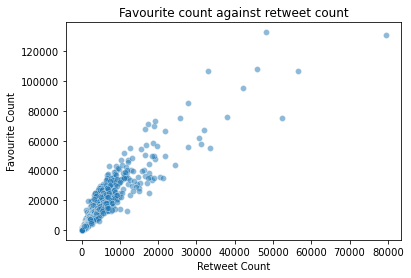

In [81]:
sb.scatterplot(data = df_master, x = 'retweet_count', y = 'favorite_count', alpha = 0.5)
plt.title('Favourite count against retweet count')
plt.xlabel('Retweet Count')
plt.ylabel('Favourite Count');

We can see that there is a clear positive correlation between Favourites and Retweets, and that most values are in the range between 0 and 10k retweets, and 0 and 40k favourites, with some very large outliers. 

## What are the ten most frequent dog breeds?

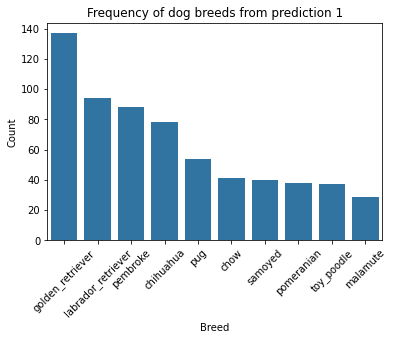

In [82]:
# Lets start with p1 (prediction 1)

base_color = sb.color_palette()[0]

freq = df_master.p1.value_counts()
breed_order = freq.index[0:10]

sb.countplot(data = df_master, x = 'p1', color = base_color, order = breed_order)
plt.xticks(rotation = 45)
plt.title('Frequency of dog breeds from prediction 1')
plt.xlabel('Breed')
plt.ylabel('Count');

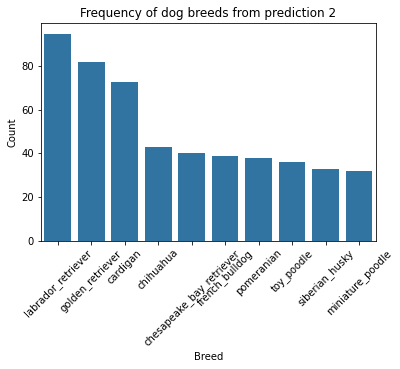

In [83]:
# Now prediction 2

freq = df_master.p2.value_counts()
breed_order = freq.index[0:10]

sb.countplot(data = df_master, x = 'p2', color = base_color, order = breed_order)
plt.xticks(rotation = 45)
plt.title('Frequency of dog breeds from prediction 2')
plt.xlabel('Breed')
plt.ylabel('Count');

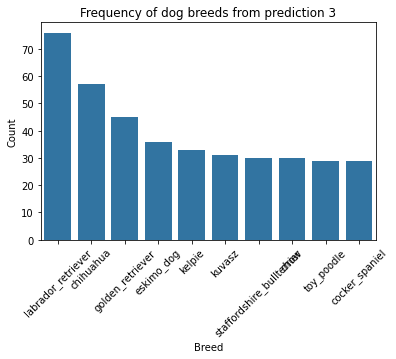

In [84]:
# And finally, prediction 3

freq = df_master.p3.value_counts()
breed_order = freq.index[0:10]

sb.countplot(data = df_master, x = 'p3', color = base_color, order = breed_order)
plt.xticks(rotation = 45)
plt.title('Frequency of dog breeds from prediction 3')
plt.xlabel('Breed')
plt.ylabel('Count');

We can see that Golden Retriever is the most common in prediction 1, and is in the top 3 in predictions 2 and 3. 

## What are the ten most common dog names?

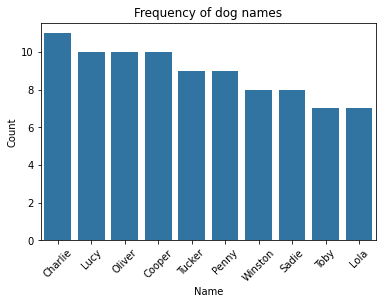

In [85]:
freq = df_master.name.value_counts()
# We filter the first one because the most common value io
name_order = freq.index[1:11]

sb.countplot(data = df_master, x = 'name', color = base_color, order = name_order)
plt.xticks(rotation = 45)
plt.title('Frequency of dog names')
plt.xlabel('Name')
plt.ylabel('Count');

The most common name seems to be Charlie, followed by Lucy, Cooper, Oliver, Penny, Tucker, Sadle, Winston, Daisy and Lola.

## Insights

- Favourites count and Retweets count are positively correlated.
- The most frequent dog breed in p1 is Golden Retriever.
- The most frequent dog breed in p2 is Labrador Retriever.
- The most frequent dog breed in p3 is Labrador Retriever.
- The most common dog name is Charlie (male), followed by Lucy (female). 